<a id='step5'></a>
# <center>Creating Customer Segments</center>
<center> (Unsupervised Learning)</center>





![Segments](Description-Images/customer-segments.jpg)

* [**0. Introduction**](#step0) 
* [**I. Data Exploration**](#step1)
* [**II. Data Preprocessing**](#step2) 
* [**III. Clustering**](#step3)
* [**IV. Conclusion**](#step4) 

<a id='step0'></a>

----------
# <font color='brown'>0. Introduction:</font>

In this project, we will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

By Running the code block below we will load the wholesale customers dataset, along with the necessary Python libraries required for this project.

In [1]:
# Import libraries necessary for this project
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Allows the use of display() for DataFrames
from IPython.display import display 

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


<a id='step1'></a>

--------------------------------------------------------------
# <font color='brown'>I. Data Exploration</font>
In this section, we will begin exploring the data through visualizations and code to understand how each feature is related to the others. We will observe a statistical description of the dataset, consider the relevance of each feature, and we will select a few sample data points from the dataset which we will track through the course of this project.

By running the code block below we will observe a statistical description of the dataset. The dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. 

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail.

In the code block below, we add **three** indices to the `indices` list which will represent the customers we plan to track.

In [3]:
# I Select three indices of customers will be tracked during this analysis
indices = [85,146,203]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,7769,1936,2177,926,73,520
2,583,685,2216,469,954,18


Considering the total purchase cost of each product category and the statistical description of the dataset above we could say that:


* **Sample0:** represents a whole sale retailer or a super or hyper market. Because this customer spends enormous amount (more than the mean) in five features except Frozen. 


* **Sample1:** represents a Restaurant. Since it spends more amount on Fresh food.


* **Sample2:** may represent a small fast food restaurant + a small cafe shop or a medium corner shop (medium in size). All spended amounts are low than the mean besides it spends more amounts on grocery.

### Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? **We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature**.

In the code block below, we will implement the following:
 - We will assign `new_data` a copy of the data by removing the  feature `Detergents_Paper` using the `DataFrame.drop` function.
 - We will use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
 - We will use the `Detergents_Paper`as the target label. We will set a `test_size` of `0.25` and set a `random_state`.
 - We will import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - We will report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# Making a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data =data.drop('Detergents_Paper',axis=1)
target= data['Detergents_Paper']

# Splitting the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=48)

# Creating a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state= 48 )
fitted_regressor=regressor.fit(X_train,y_train)
# Predicting Detergents Paper values
y_pred=fitted_regressor.predict(X_test)

# Reporting the score of the prediction using the testing set
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print "R2 score for Detergents_Paper prediction is : ",score

R2 score for Detergents_Paper prediction is :  0.838483903337


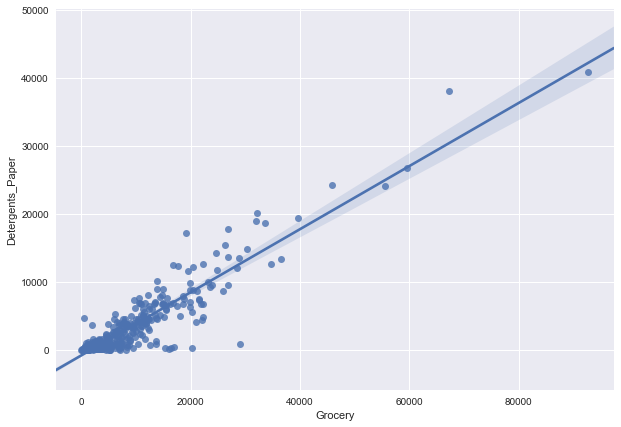

In [5]:
# Grocery VS Detergents_Paper
fig = plt.figure(figsize=(10,7))
ax=sns.regplot(data['Grocery'],data['Detergents_Paper'])

In [6]:
# Pearson's R coefficient for Grocery and Detergents_Paper
correlation=sp.stats.pearsonr(data['Grocery'],data['Detergents_Paper'])[0]
print "The correlation coefficient Pearson's R for Grocery and Detergents_Paper is: ",correlation

The correlation coefficient Pearson's R for Grocery and Detergents_Paper is:  0.924640690854


#### Feature relevance : Analysis

I chose to predict **Detergents_Paper**. Since it is very general product. So, it might be used by all the types of customers. From the results above, it’s very clear that ** *Detergents_Paper* ** has a very high R2 score 0.838. Which means that it is one of the very predictable features by the Decision Tree Regressor. As a result, this feature is highly correlated with the data which makes it **less important** ; It will have a low weight in feature’s importance. From the Regplot above it seems that ** *Detergents_Paper* ** and ** *Grocery* ** are very highly correlated which makes * **Grocery** *  an elected feature to be predicted and not an essential feature in the dataset if * **Detergents_Paper** * is kept in the data as a train feature.** *Detegrents_Paper* ** may not be necessary for identifying customer's habits for two reasons:    

- 1) It can be predicted by the rest of the data very high R2 score.
- 2) It is very highly correlated with * **Grocery** *. So, its variance can be explained by 92% which makes it not important for identifying customer's habits.


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If we found that the feature we attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, we believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. 

By running the code block below it will produce a scatter matrix.

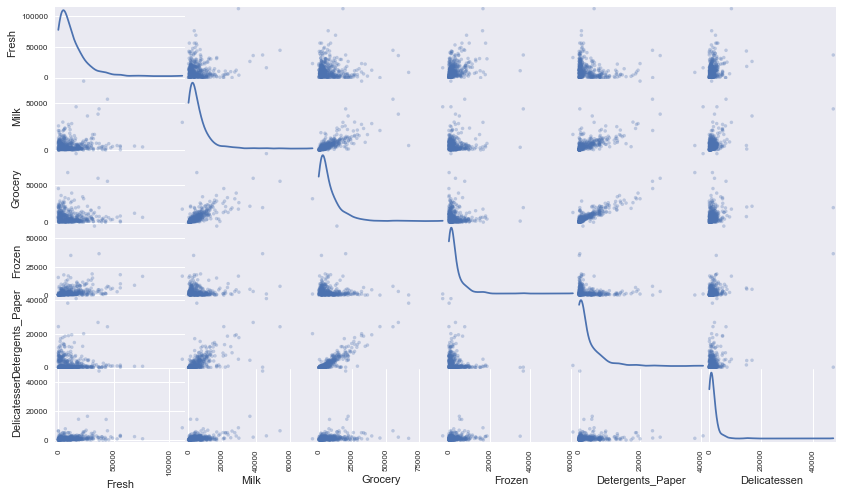

In [7]:
# Produce a scatter matrix for each pair of features in the data
scatter_matrix=pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

In the code block bellow we will report different correlation coefficients between features. We will use heatmap to plot the degree of each correlation.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


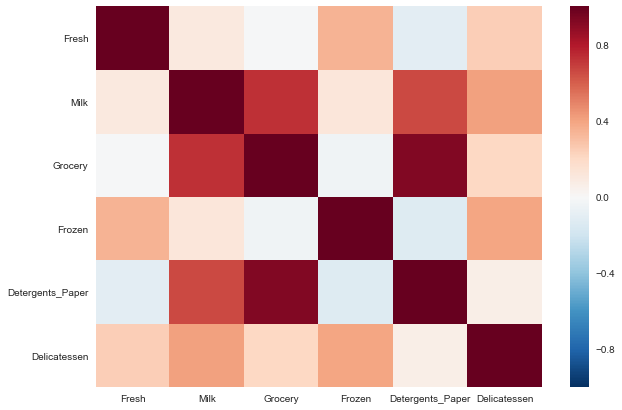

In [8]:
# Feature's Correlation table
features_name=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
corr=data.corr()
display(corr)

# Correlation degree using heatmap
fig = plt.figure(figsize=(10,7))
ax=sns.heatmap(corr, fmt='.2g', linewidths=0, linecolor='white', 
            cbar=True,  xticklabels=features_name, 
            yticklabels=features_name)

### Outilers Edges:

In [9]:
# Extracting bottom thresholds for outliers
for feature in data.columns:
    q1=data[feature].describe()['25%']
    q3=data[feature].describe()['75%']
    print feature,"'s threshold for bottom outliers is: ",q1-1.5*(q3-q1)

Fresh 's threshold for bottom outliers is:  -17581.25
Milk 's threshold for bottom outliers is:  -6952.875
Grocery 's threshold for bottom outliers is:  -10601.125
Frozen 's threshold for bottom outliers is:  -3475.75
Detergents_Paper 's threshold for bottom outliers is:  -5241.125
Delicatessen 's threshold for bottom outliers is:  -1709.75


In [10]:
# Number of outliers for each feature
for feature in data.columns:
    feature_outliers=plt.boxplot(data[feature])['fliers'][0].get_data()[1]
    plt.close()
    print "The number of outliers in",feature,'is: ' ,len(feature_outliers)

The number of outliers in Fresh is:  20
The number of outliers in Milk is:  28
The number of outliers in Grocery is:  24
The number of outliers in Frozen is:  43
The number of outliers in Detergents_Paper is:  30
The number of outliers in Delicatessen is:  27


* **Distribution of the dataset: ** From the Kernel Density All features seems to be positively skewed Since the majority of values are near to 0 compared the mean of each feature. 


**Correlated features: **
- From the correlation's table above, it seems that Detergents_Paper and Grocery are very highly correlated positively by *0.9246*. So, the chosen feature to be predicted (* **Detergents_Paper** *) is less relevant since 92.46% of its variance is explained by * **Grocery** *.
    
    - Milk and Grocery have high positive correlation coefficient. 0.72*.
    - Milk and Detergents_ Paper are highly positively correlated **0.66**
    - Delicatessen and Frozen have a medium level of positive correlation **0.39**
    - Fresh and Frozen also have a medium level of positive correlation **0.34**
    - Milk and Delicatessen have a medium level of positive correlation **0.40**.

    - Fresh and Delicatessen: **0.24** weakly correlated
    - Grocery and Delicatessen: **0.20** weakly correlated 

- **For the other tuples it seems that they aren't correlated at all or if it exists some correlation it's very weak positive or negative correlation. **


*  **Outliers: ** Since the calculated bottom thresholds for all features were negative implies that all the outliers displayed above are **top outliers**.
    - The number of outliers in Fresh is:  20
    - The number of outliers in Milk is:  28
    - The number of outliers in Grocery is:  24
    - The number of outliers in Frozen is:  43
    - The number of outliers in Detergents_Paper is:  30
    - The number of outliers in Delicatessen is:  27

*  **Number of data points near to 0: ** From the KDE in the scatter matrix above it appears that the majority of data points are near to 0.

- From the correlation table **Detergents_Paper** have two strong correlations and one of them is the highest in the whole table. The more the feature is correlated with the other ones the more it is predictable and the less it is relevant. So, Detergents_Paper is one of the less relevant features in this dataset. 


<a id='step2'></a>

-----------------------------

# <font color='brown'>II. Data Preprocessing</font>
In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that obtained results from the analysis are significant and meaningful.

### Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, we will implement the following:
 - We will assign a copy of the data to `log_data` after applying logarithmic scaling. We will use the `np.log` function for this.
 - We will assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, We will use `np.log`.

E:\Anaconda2\envs\DAND\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead


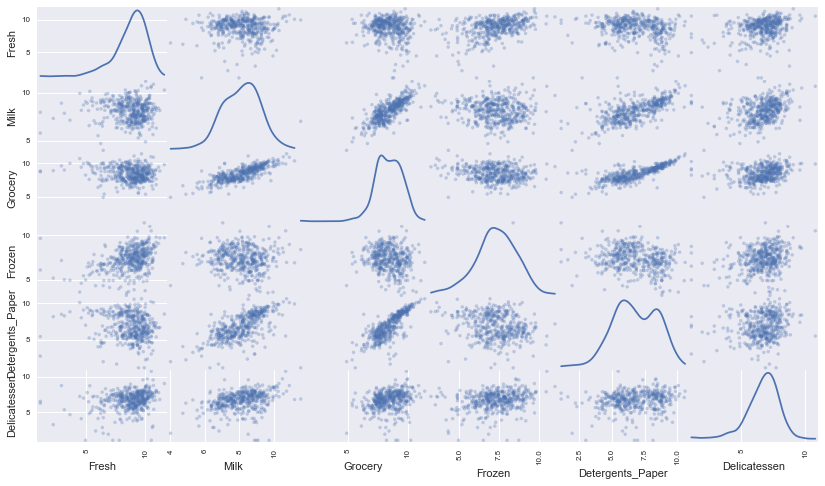

In [11]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

#### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. By Running the code below we willsee how the sample data chosen earlier has been changed after applying the natural logarithm.

In [12]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
1,8.957897,7.568379,7.685703,6.830874,4.290459,6.253829
2,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Outliers Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, we will implement the following:
 - We will assign the value of the 25th percentile for the given feature to `Q1`. We will use `np.percentile` for this.
 - We will assign the value of the 75th percentile for the given feature to `Q3`. Again, We will use `np.percentile`.
 - We will assign the calculation of an outlier step for the given feature to `step`.
 - We will remove data points from the dataset by adding indices to the `outliers` list.

In [13]:
# For each feature We will find the data points with extreme high or low values
outliers=[]
for feature in log_data.keys():
    
    # We will calculate Q1 (25th percentile of the data) for the given feature
    Q1 = log_data[feature].describe()['25%']
    
    # We will calculate Q3 (75th percentile of the data) for the given feature
    Q3 = log_data[feature].describe()['75%']
    
    # We will use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display outliers
    print "Data points considered outliers for the feature '{}':".format(feature)                          
    outlier_per_feature= log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outlier_per_feature)
    outliers=  outliers + list(outlier_per_feature.index.values)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [14]:
# Creating list of more outliers which are the same for multiple features.
final_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))


print "Outliers: {}".format(final_outliers)

# Removing the outliers, if any were specified 
good_data = log_data.drop(log_data.index[final_outliers]).reset_index(drop = True)
print "The good dataset now has {} observations after removing outliers.".format(len(good_data))

Outliers: [128, 65, 66, 75, 154]
The good dataset now has 435 observations after removing outliers.


* **Outliers for more than one feature (final outliers): ** 
    - row 65:  outlier in: Fresh and Frozen.
    - row 66:  outlier in: Fresh and Delicatessen.
    - row 75:  outlier in: Grocery and Detergents_Paper.
    - row 128: outlier in: Fresh and Delicatessen.
    - row 154: outlier in: Milk, Grocery and Delicatessen.


* These data points should be removed. Because K-means is very sensible to outliers if such outliers exists the cluster centers may not represent the real centers.

## Features Transformation
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

###  PCA: principal component analysis

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, we will implement the following:
 - We will import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - We will apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [15]:
def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

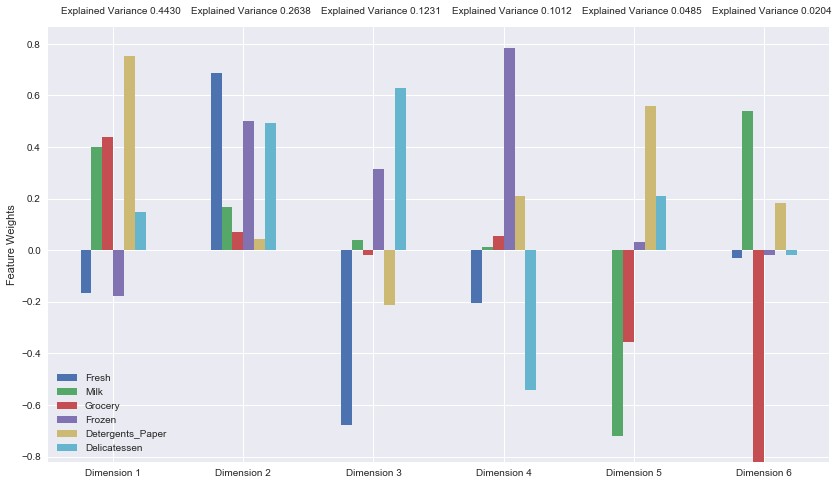

In [16]:
# Applying PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA 
pca = PCA(n_components=6).fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = pca_results(good_data, pca)



In [17]:
# Weights of each feature in each dimension:
components=pca.components_

# store results in a Dataframe
index=['Dimension 1','Dimension 2','Dimension 3','Dimension 4','Dimension 5','Dimension 6']
columns=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
weights_df =pd.DataFrame(components,columns=columns,index=index)

print "Weights of each feature in each dimension"
display(weights_df) 

Weights of each feature in each dimension


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,-0.167464,0.401439,0.438111,-0.178210,0.751426,0.149871
Dimension 2,0.685935,0.167228,0.070729,0.500542,0.042444,0.494147
Dimension 3,-0.677389,0.040205,-0.019533,0.315043,-0.211702,0.628551
Dimension 4,-0.204293,0.012811,0.055676,0.785449,0.209614,-0.542340
Dimension 5,0.002614,-0.719238,-0.355386,0.033086,0.558154,0.209186
Dimension 6,-0.029156,0.540183,-0.820533,-0.020541,0.182388,-0.019748


In [18]:
# Explained Variance and Explained variance ratio for each dimension
EV=pca.explained_variance_
EVR=pca.explained_variance_ratio_

# store results in a Dataframe
columns=['Dimension 1','Dimension 2','Dimension 3','Dimension 4','Dimension 5','Dimension 6']
index=['Explained_Variance','Explained_Variance_Ratio']
EV_EVR_df=pd.DataFrame([EV,EVR],columns=columns,index=index)

print "The explained variance and its ratio for each dimension"
display(EV_EVR_df)


The explained variance and its ratio for each dimension


,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
Explained_Variance,4.538383,2.702308,1.260675,1.036794,0.496858,0.209060
Explained_Variance_Ratio,0.443025,0.263792,0.123064,0.101209,0.048502,0.020408


* The total variance in the data explained by the first and second principal component is: 7.2406
    - **In ratio terms: these two dimensions explains 70.67% of the total variance. **

* The total variance in the data explained by the four principal components is: 9.5379
    - **In ratio terms: 93.09% of the total variance is explained by these four principal components. **

    
    
### Components Analysis:

**Dimension 1: **
    
- The first principal component explains 44.30 % of the total variance. This component is strongly, positively correlated with ** *Detergents_Paper * **(0.7514). It has a medium positive correlation with ** *Grocery* ** (0.4381) and ** *Milk* **(0.4014). It is weakly positively correlated with ** *Delicatessen* **(0.1498) and finally, it has weak negative correlation with ** *Frozen* **(-0.1782) and ** *Fresh* **(-0.1674). 

- This component can be viewed as a measure of the purchased amounts of ** *Detergents_Paper* **, ** *Grocery* **, ** *Milk* **, it represents weakly the increase of purchasing amounts of ** *Delicatessen* ** and represents weakly the lack or the decrease in buying ** *Frozen* ** and ** *Fresh* **. Furthermore, we see that the first principal component correlates most strongly with ** *Detergents_Paper * **. In fact, we could state that customers with an important purchasing amount of ** *Grocery* ** and ** *Milk* ** would tend to buy a high quantity of ** *Detergents_Paper* **.  **Based on these weights coefficient’s and the diversity of represented products this dimension could be represented by: Super markets or Some other wholesale retailers. **


**Dimension 2: **
    
- The second principal component explains 26.37% of the total variance. This component is strongly, positively correlated with ** *Fresh * **(0.6859). It has a medium to strong positive correlation with ** *Frozen* ** (0.5005) and ** *Delicatessen* **(0.4941) and it is weakly positively correlated with ** *Milk* **(0.1672), ** *Grocery* **(0.0707 very weak) and ** *Detergents_Paper* **(0.0424 very weak).

- This component represents principally the purchased amounts of ** * Fresh * **, ** * Frozen * **, ** * Delicatessen * **, it represents weakly the increase of purchasing amounts of ** *Milk* **, ** *Grocery* ** and ** *Detergents_Paper* **. Furthermore, we could state that the first and the second components complements each other (Seems to be Orthogonal). The weak features in the first component are the strong ones in the second one. **Since Fresh/Frozen and Delicatessen are the most weighted products with an acceptable amount of Milk this dimension could represents: Restaurants/Hotels (contains restaurants and coffee shops). **  


**Dimension 3: **

* The Third principal component explains 12.30% of the total variance. This component has:

    - A strong negative correlation with ** *Fresh* **(-0.6773). 
    - A strong positive correlation with ** *Delicatessen* **(0.6285). 
    - It has a medium to weak positive correlation with ** *Frozen* ** (0.3150).
    - A weak negative correlation with ** *Detergents_Paper* **(-0.2117). 
    - A very weak correlation with ** *Milk* **(0.0402).  
    - A very weak negative (near to -0) correlation with ** *Grocery* **(-0.0195).

* This third component represents principally the lack in buying ** *Fresh* ** and the increase of purchased amount of ** *Delicatessen* ** and ** *Frozen* **. And it represents weakly the lack in buying ** *Detergents_Paper* **. **The most represented products in this dimension are Delicatessen and Frozen ones this component may represents: Delis or Small markets in neighborhoods or Some medium corner shops. **


**Dimension 4: **

- The Fourth principal component explains 10.12% of the total variance. This component has:

    - A very strong positive correlation with ** *Frozen* **(0.7854). 
    - A medium negative correlation with ** *Delicatessen* **(-0.5423). 
    - It has a weak positive correlation with ** *Detergents_Paper* ** (0.2096).
    - A weak negative correlation with ** *Fresh* **(-0.2042). 
    - A very weak positive correlation with ** *Grocery* **(0.0556).
    - A very weak positive correlation (near to +0) correlation with ** *Milk * **(0.0128).

- This Fourth component represents principally the increase of purchased amount of ** *Frozen* ** and the lack in buying ** *Delicatessen* **. And it represents weakly the impact of the other features. **So, we could say that this dimension represents: Markets/shops of frozen products. **


**Dimension 5: **

- The Fifth component explains 4.85% of the total variance. This component has:

    - A very strong negative correlation with ** *Milk* **(-0.7192). 
    - A medium to strong positive correlation with ** *Detergents_Paper* **(0.5581). 
    - It has a medium negative correlation with ** *Grocery* ** (-0.3553).
    - A weak positive correlation with ** *Delicatessen* **(0.2091). 
    - A very weak positive correlation (near to -0) correlation with ** *Frozen* **(0.0330).
    - And very weak correlation (near to +0) with ** *Fresh* **(0.0026)

- This component represents principally and the lack in buying ** * Milk * ** and ** *Grocery* **. Also, it increases with the increase of purchased amount of ** *Detergents_Paper * **. And it represents weakly the impact of the other features. ** This component could be represented by:  Delis shops or Corner shops. **


**Dimension 6: **

- The Final component explains 2.04 % of the total variance. This component has:
    - A very strong Negative correlation with ** *Grocery* **(-0.8205). 
    - A medium positive correlation with ** *Milk* **(0.5401). 
    - It has a weak positive correlation with ** *Detergents_Paper* ** (0.1823).
    - A very weak negative correlation with ** *Fresh* **(-0.0291). 
    - A very weak negative correlation with ** *Frozen* **(-0.0205).
    - A very weak negative correlation (near to -0) with ** *Delicatessen* **(-0.0197).

- This component represents principally the lack in buying ** *Grocery* **. Also, it increases with the increase of purchased amount of ** *Milk* ** and ** *Detergents_Paper* **. And it represents very weakly the impact of the other features. ** So, Coffee shops / Milk shops are the logic candidate that may represent this segment. **


#### Samples projections on the new space

In [19]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,5.3316,1.8845,-0.6957,-0.1972,-0.5461,-0.3802
1,-2.4592,-0.5885,-0.0383,-0.7641,-0.8301,-0.1112
2,-0.8863,-4.4309,-1.1987,1.5812,0.6125,-0.0624


### Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, we will implement the following:
 - We will assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - We will apply a PCA transformation of `good_data` using `pca.transform`, and we will assign the results to `reduced_data`.
 - We will apply a PCA transformation of `log_samples` using `pca.transform`, and we will assign the results to `pca_samples`.

In [20]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

By Running the code below we will see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. 

In [21]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,5.3316,1.8845
1,-2.4592,-0.5885
2,-0.8863,-4.4309


### Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

By running the code cell below a biplot the reduced-dimension data will be produced.

In [22]:
def biplot(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute

    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

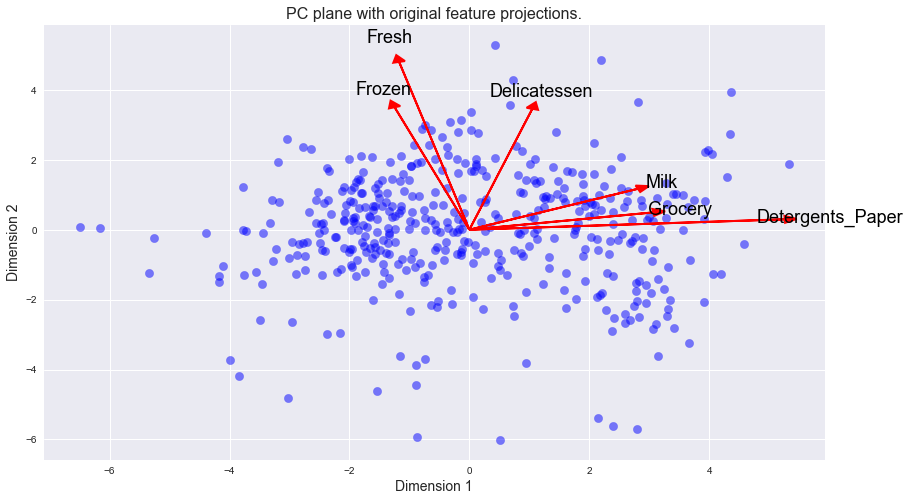

In [23]:
# Create a biplot
biplot(good_data, reduced_data, pca)

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

<a id='step3'></a>

----
# <font color='brown'>III. Clustering</font>

In this section, we will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. We will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

## K-Means VS Gaussian Mixture Model

### Hard Clustering: 

**K-means** is a hard clustering algorithm each data point either belongs to a cluster completely or not.

- Advantages:
    - Easy to implement
    - High speed performance
    - Measurable and efficient in large data collection 

- Disadvantages:
    - The selection of optimal number of clusters is difficult
    - The Selection of initial centroids is random 
    - Initial seeds have a strong impact on the final results 
    - Sensitive to scale
    - K-means often doesn’t work when clusters are not spherical.
        

### Soft Clustering: 

**Gaussian Mixture Model** is a soft clustering algorithm instead of putting each data point in one cluster, a probability or likelihood of that data point to be in those clusters is assigned.

- Advantages:
    - Gaussians are well understood and easy to estimate
    - Fast compared to K-means when the number of features and clusters is very high
    - Can deal with spherical and non-spherical clusters

- Disadvantages:
    - If the real distribution of each one of resulted clusters is multimodal in this case gaussian models cannot represent them well.


**Sources: **
- http://www.cse.psu.edu/~rtc12/CSE586Spring2010/lectures/cse586gmmemPart1_6pp.pdf
- https://www.cse.iitk.ac.in/users/piyush/courses/pml_winter16/slides_lec7.pdf
- https://davidrosenberg.github.io/ml2015/docs/13.mixture-models.pdf

- http://playwidtech.blogspot.com/2013/02/k-means-clustering-advantages-and.html
    


**The Chosen Algorithm: **
    
- Since the number of clusters (2) is known we already decided to use just two components and, the distribution shape of resulted clusters is unknown (monomodal or multimodal for each of the two components and for all of the features) I decided to choose K-means algorithm.

## Creating Clusters
Depending on the problem, the number of clusters that we expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, we will  implement the following:
 
 - we will fit a clustering algorithm to the `reduced_data` and we will assign it to `clusterer`.
 - we will predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - we will find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - we will predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - we will import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
 - we will assign the silhouette score to `score` and print the result.

In [24]:
from sklearn.mixture import GMM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
def silhouette_scores(i,reduced_data,pca_samples):
    #  I will apply Kmeans and GMM clustering algorithms to the reduced data 
    
    clusterer1 = KMeans(n_clusters=i,random_state=42).fit(reduced_data)
    from sklearn.mixture import GMM
    clusterer2 =GMM(n_components=i,random_state=42)

    #  Predicting the cluster for each data point
    preds1 =clusterer1.predict(reduced_data) 
    preds2 =clusterer2.fit_predict(reduced_data)  

    #  Finding the cluster centers
    centers1 =clusterer1.cluster_centers_  
    centers2 =clusterer2.means_

    #  Predicting the cluster for each transformed sample data point
    sample_preds1 = clusterer1.predict(pca_samples ) 
    sample_preds2 = clusterer2.predict(pca_samples )

    #  Calculating the mean silhouette coefficient for the number of clusters chosen
    
    score1 = silhouette_score(reduced_data, preds1)
    score2 = silhouette_score(reduced_data, preds2)
    result1=['silhouette score for kmeans learner with a a number of n_clusters = ']+[i]+['is:']+[score1]
    result2=['silhouette score for Mixture Gaussian Model with a a n_components = ']+[i]+['is:']+[score2]
    return (result1,result2)

In [25]:
for i in [2,3,93,97]:
    print silhouette_scores(i,reduced_data,pca_samples)

(['silhouette score for kmeans learner with a a number of n_clusters = ', 2, 'is:', 0.4262810154691084], ['silhouette score for Mixture Gaussian Model with a a n_components = ', 2, 'is:', 0.41181886438624477])
(['silhouette score for kmeans learner with a a number of n_clusters = ', 3, 'is:', 0.39689092644980506], ['silhouette score for Mixture Gaussian Model with a a n_components = ', 3, 'is:', 0.37356074717499449])
(['silhouette score for kmeans learner with a a number of n_clusters = ', 93, 'is:', 0.40530776494430282], ['silhouette score for Mixture Gaussian Model with a a n_components = ', 93, 'is:', 0.10318255473428559])
(['silhouette score for kmeans learner with a a number of n_clusters = ', 97, 'is:', 0.40866514458511055], ['silhouette score for Mixture Gaussian Model with a a n_components = ', 97, 'is:', 0.079378942680767756])


 - The mentioned clusters above they represent a local maximum of silhouette score for K-mean algorithm for n_clusters inferior than 100 .
* For K-means 
    - n_clusters= 2  : Silhouette score= 0.4262
    - n_clusters= 93 : Silhouette score= 0.4053
    - n_clusters= 97 : Silhouette score= 0.4086

- For GMM there is only one local maximum for silhouette score this clusters number is 3.
* For  Gaussian Mixture model: 
    - n_clusters =3  : Silhouette score= 0.3735
    
- The maximum silhouette score is 0.4262 when using k-means with an n_clusters=2.

### Cluster Visualization
Once we have chosen the optimal number of clusters for our clustering algorithm using the scoring metric above, we can now visualize the results by executing the code block below. 

In [26]:
# Applying Kmeans algorithm to the reduced data 
    
clusterer = KMeans(n_clusters=2,random_state=42).fit(reduced_data)


# Predicting the cluster for each data point
preds =clusterer.predict(reduced_data) 
 

# Finding the cluster centers
centers =clusterer.cluster_centers_  


# Predicting the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples ) 


# Calculating the mean silhouette coefficient for the number of clusters chosen

score = silhouette_score(reduced_data, preds)


In [27]:
import matplotlib.cm as cm
def cluster_results(reduced_data, preds, centers, pca_samples):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions
    Adds cues for cluster centers and student-selected sample data
    '''

    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    # Plot transformed sample points 
    ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
               s = 150, linewidth = 4, color = 'black', marker = 'x');

    # Set plot title
    ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");


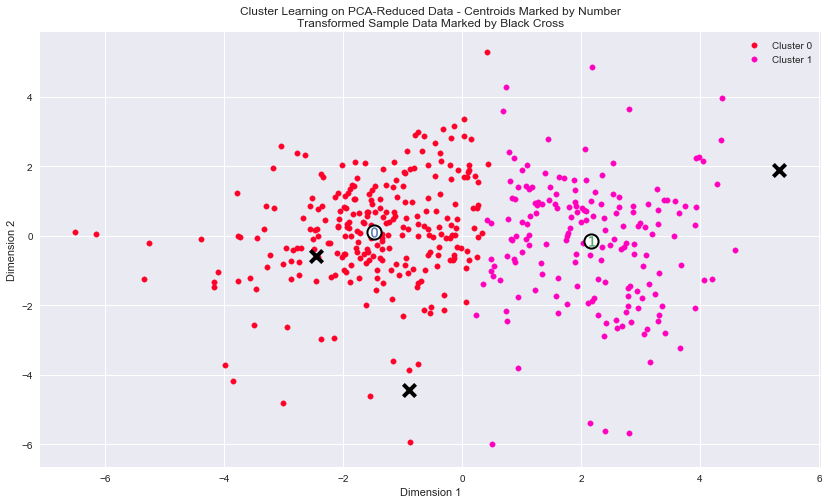

In [28]:
# Display the results of the clustering from implementation
cluster_results(reduced_data, preds, centers, pca_samples)

##  Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, we will implement the following:
 - We will apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - We will apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.

In [29]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers =np.exp(log_centers)

# Display the true centers
segments = ['Segment  {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


### Observation:
**Segment 0: ** represents the center of cluster 0. This center has very low values (compared to the mean) in Milk, Grocery and Detegents_Paper. And has low values in Delicatessen, Frozen and Fresh but near to the mean compared with the first three features. These characteristics corresponds to the second Component. So, these points of cluster 0 represents: **Restaurants/Hotels (contains restaurants and coffee shops) and corner shops**

**Segment 1: ** represents the center of cluster 1. This center has very low values (compared to the mean) in Fresh and Frozen. And the values of Milk, Delicatessen are near to the mean compared with the first two features. And Finally, it has very high values compared to the means of Grocery and Detergents_Paper. These characteristics corresponds to the First Component. So, these points of cluster 1 represents: ** Super Markets or Some other wholesale retailer. ** 

It appears clearly that **segment 0** is more correlated with the **second dimension** which is correlated with Fresh, Frozen and Delicatessen From the second component analysis we can say that **segment 0** represents: **Restaurants/Hotels (contains restaurants and coffee shops) and corner shops. ** And it is also evident that **segment 1** is more correlated with the first dimension or the first component which is more correlated with Detergents_Paper, Grocery and Milk. From the first component analysis we can say that this **segment 1** represents: ** Super Markets or Wholesale retailers. **

Let's find which cluster each sample point is predicted to be.

In [30]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


<a id='step4'></a>

-----
# <font color='brown'>IV. Conclusion</font>

In this final section, we will investigate ways that we can make use of the clustered data. First, we will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, we will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, we will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### A/B Testing:
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* **Segment0** represent hotels, Restaurants and Cafe. Since the majority of this segment's customers spend more amount on fresh products (perishable products) the impact of reducing the frequency of delivering would be negative.

* Since the majority of **Segment1** customers are whole sale retailers reducing the frequency of delivering won't have a negative impact if the delivered quantity is enough for those customers

* **But to be sure of these results we should conduct an A/B test following these steps:**
    - From each cluster we should select two representative samples(random)

        - **Two random samples from cluster0: A_0 and B_0** 

        - **Two random samples from cluster 1: A_1 and B_1** 

    - We will apply the change in delivery frequency from 5 days to 3 days for the samples: A_0 and A_1 (The change groups)

    - We keep the delivery frequency unchanged for the samples B_0 and B_1 (The control groups).

    - We will conduct survey that measures the level of satisfaction for customers in these samples.

    - In general customers with high level of satisfaction will spend at least the same amount they used to spend. And customers with low satisfaction level will spend at most the same amount they used to spend.

    - After receiving data related to these surveys. We use transform satisfaction levels into integers using **labels encoder**. And we should conduct an **hypothesis testing for each one of the two clusters**.
        - **For cluster0:**
            - **The null hypothesis:** the mean of satisfaction level in A_0 is significantly equal to the mean of satisfaction level in B_0
            - **The alternative hypothesis:** actually, the mean of satisfaction levels for A_0 and B_0 are significantly different.
        
        - **For cluster1:**
            - **The null hypothesis:** the mean of satisfaction level in A_1 is significantly equal to the mean of satisfaction level in B_1
            - **The alternative hypothesis:** actually, the mean of satisfaction levels for A_1 and B_1 are significantly different.
 
        - We will apply a **two tailed T-test** (for this type of dependent variable since the features have a **gaussian shape**)
 
    - **Based on these results we could say if the change in delivery frequency will have a positive or a negative impact on the satisfaction level for each one of the two clusters.**

### New Customers Labeling

Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assuming the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

To label the new customers, we will first need to build and train  supervised learning classifier. We could train and validate it on this data set. After that the model will be ready to predict the **'customer segment'** for the 10 new customers.

* The target variable will be this engineered feature called **'customer segment'**. It will have two labels '0' corresponds to cluster 0 which represent hotels, Restaurants, cafe and '1' corresponds to cluster 1 which represents whole sale retailers. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

By running the code block below we will see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, we will find the sample points chosen earlier circled in the plot, which will identify their labeling.

In [31]:
def channel_results(reduced_data, outliers, pca_samples):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions using the full dataset
    Data is labeled by "Channel" and cues added for student-selected sample data
    '''

    # Check that the dataset is loadable
    try:
        full_data = pd.read_csv("customers.csv")
    except:
        print "Dataset could not be loaded. Is the file missing?"
        return False

    # Creating the Channel DataFrame
    channel = pd.DataFrame(full_data['Channel'], columns = ['Channel'])
    channel = channel.drop(channel.index[outliers]).reset_index(drop = True)
    labeled = pd.concat([reduced_data, channel], axis = 1)

    # Generating the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned Channel
    labels = ['Hotel/Restaurant/Cafe', 'Retailer']
    grouped = labeled.groupby('Channel')
    for i, channel in grouped:   
        channel.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                     color = cmap((i-1)*1.0/2), label = labels[i-1], s=30);

    # Plot transformed sample points   
    for i, sample in enumerate(pca_samples):
        ax.scatter(x = sample[0], y = sample[1], \
               s = 200, linewidth = 3, color = 'black', marker = 'o', facecolors = 'none');
        ax.scatter(x = sample[0]+0.25, y = sample[1]+0.3, marker='$%d$'%(i), alpha = 1, s=125);

    # Set plot title
    ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data Circled");

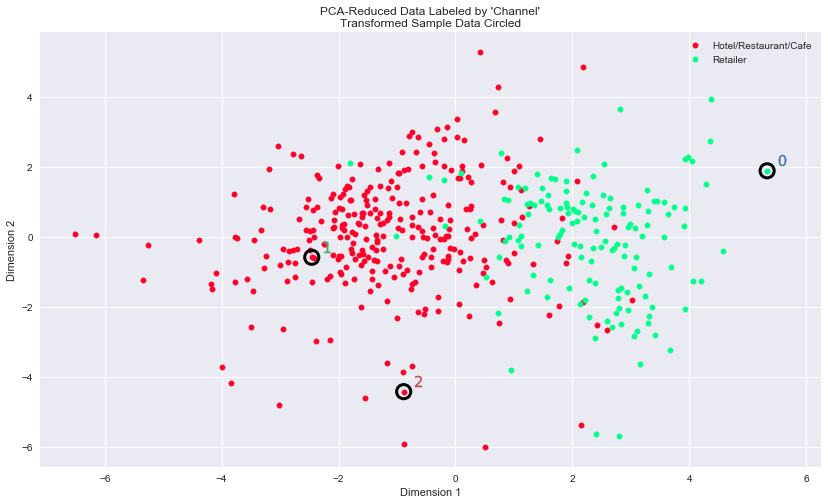

In [32]:
# Display the clustering results based on 'Channel' data
channel_results(reduced_data, final_outliers, pca_samples)

From the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) channel is categorical attribute which have two values 'Ho/Re/Ca' and 'retailers'. The channels respectively correspond to the red cluster and the green one. The graph above is very similar to the one we found earlier using K-means as clustering model. The red cluster(Ho/Re/Ca) corresponds to segment0 and the green one(Retailers) corresponds to segment1.Using this analogy it's very clear that the chosen samples preserved their clusters.

As a result, these classifications are consistent. So, we could say: This clustering model (K-means) can predict the channel value with a high performance. So segment0 represents **Hotels, Restaurants and cafe** and segment1 represents **Retailers**.




[**Go back to the beginning**](#step5)

###### This project was completed as a part of the Machine Learning Engineer Nanodegree from Udacity.